# Data Visualization

In [15]:
import sys
import pandas as pd  
import matplotlib.pyplot as plt
sys.path.append('../')   # Add parent directory to Python path

Curb Dataset: Lab Dataset with ideal Labels<br>
a. curb 1cm<br>
b. curb 2cm<br>
c. curb 3cm<br>
d. ramp 0cm to 3cm<br>
e. transition stone 0cm to 3cm<br>
P3

In [11]:
df_zero= pd.read_csv('../data/Curb/P3/handlebar/Accelerometer/Accelerometer.0.csv')  
df_zero

,Date,NTP,GNSS-Time,Acc-X,Acc-Y,Acc-Z
0,2024-07-29T13:51:03.008,2024-07-29 13:51:06.990,-1,5.094864,3.275269,9.126694
1,2024-07-29T13:51:03.022,2024-07-29 13:51:07.003,-1,3.260910,2.413361,8.097183
2,2024-07-29T13:51:03.023,2024-07-29 13:51:07.005,-1,3.160339,3.251327,8.724472
3,2024-07-29T13:51:03.024,2024-07-29 13:51:07.006,-1,4.654327,3.246536,7.354980
4,2024-07-29T13:51:03.027,2024-07-29 13:51:07.008,-1,3.045425,2.418137,8.595184
...,...,...,...,...,...,...
995005,2024-07-29T15:13:31.203,2024-07-29 15:13:35.185,1722258815158,1.618485,4.314346,8.552093
995006,2024-07-29T15:13:31.209,2024-07-29 15:13:35.190,1722258815164,1.690308,4.252106,8.729263
995007,2024-07-29T15:13:31.213,2024-07-29 15:13:35.195,1722258815168,1.666367,4.271255,8.676590
995008,2024-07-29T15:13:31.220,2024-07-29 15:13:35.202,1722258815175,1.637634,4.357452,8.489838


In [12]:
df_one= pd.read_csv('../data/Curb/P3/handlebar/Accelerometer/Accelerometer_data_merged_ESP1.csv')  
df_one

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-29 13:51:06.990,5.094864,3.275269,9.126694,1.722261e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-29 13:51:07.003,3.260910,2.413361,8.097183,1.722261e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-29 13:51:07.005,3.160339,3.251327,8.724472,1.722261e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-29 13:51:07.006,4.654327,3.246536,7.354980,1.722261e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-29 13:51:07.008,3.045425,2.418137,8.595184,1.722261e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997336,997336,2024-07-29 15:13:35.185,1.618485,4.314346,8.552093,1.722266e+12,0.0,0.0,3.0,1.0,2.0,1.0,0.0
997337,997337,2024-07-29 15:13:35.190,1.690308,4.252106,8.729263,1.722266e+12,0.0,0.0,3.0,1.0,2.0,1.0,0.0
997338,997338,2024-07-29 15:13:35.195,1.666367,4.271255,8.676590,1.722266e+12,0.0,0.0,3.0,1.0,2.0,1.0,0.0
997339,997339,2024-07-29 15:13:35.202,1.637634,4.357452,8.489838,1.722266e+12,0.0,0.0,3.0,1.0,2.0,1.0,0.0


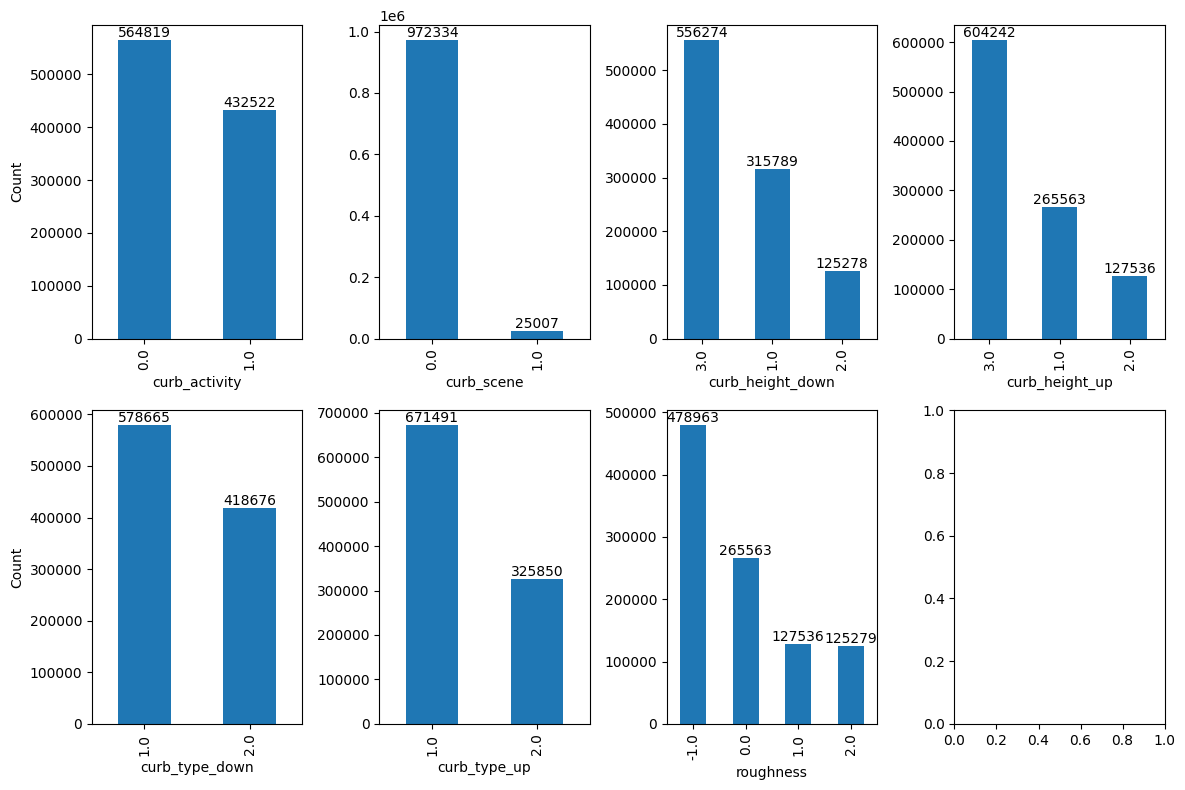

In [30]:
# Show unique values for each attribute in df_one
attributes = [
    'curb_activity',
    'curb_scene',
    'curb_height_down',
    'curb_height_up',
    'curb_type_down',
    'curb_type_up',
    'roughness'
 ]
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()
axes[0].set_ylabel('Count')
axes[4].set_ylabel('Count')

for i, attr in enumerate(attributes):
    counts = df_one[attr].value_counts()
    counts.plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(attr)
    for j, v in enumerate(counts.values):
        axes[i].text(j, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [32]:
# Frequenz
# Convert to pandas datetime if not already
df_one['NTP'] = pd.to_datetime(df_one['NTP'])
# Calculate time differences in seconds
time_diffs = df_one['NTP'].diff().dt.total_seconds()
# Print mean frequency
mean_freq = 1 / time_diffs.mean()
print(f"Sampling frequency: {mean_freq:.2f} Hz")

Sampling frequency: 201.46 Hz


Road Roughness Data:<br>
a. Asphalt Road<br>
b. Cobblestone Road<br>
c. Gravel Road<br>
d. Paving Stone Road<br>
e. Dirt Road<br>


Real World Cycling: 30HZ<br>
Label<br>
a. cycling: 0<br>
b. crossing down over any type of curb: 1<br>
c. crossing up over any type of curb: 3<br>

